In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.contrib.layers import fully_connected

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
vector = np.arange(-5,5,0.1)
def relu(x):
    return max(0.,x)
relu = np.vectorize(relu)

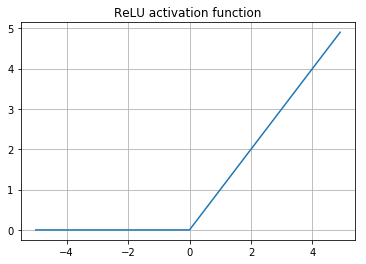

In [3]:
vector = np.arange(-5,5,0.1)
plt.plot(vector, relu(vector))
plt.grid()
plt.title("ReLU activation function");

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./data/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
n_inputs = 28*28 
n_hidden1 = 350
n_hidden2 = 200 
n_hidden3 = 100
n_outputs = 10

In [6]:
# input layer 
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
# target values
y = tf.placeholder(tf.int64)

In [7]:
hidden1 = fully_connected(X, n_hidden1)
hidden2 = fully_connected(hidden1, n_hidden2)
hidden3 = fully_connected(hidden2, n_hidden3)
logits = fully_connected(hidden3, n_outputs, activation_fn=None)

In [8]:
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
                   labels=y, logits=logits)
loss = tf.reduce_mean(cross_entropy)

In [9]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

In [10]:
correct = tf.nn.in_top_k(predictions=logits, targets=y, k=1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [11]:
n_epochs = 20
batch_size = 80

In [12]:
with tf.Session() as sess:
    ## Initializing the variables
    tf.global_variables_initializer().run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print("======= Epoch: {} ========".format(epoch+1))
        print("Train accuracy:", acc_train, "| Test accuracy:", acc_test)
        print(50*"-")
    print("Done Trainning!")

    ## Producing individual predictions
    print("\n=====================\n")
    print("Using the network to make individual predictions")
    n_pred = 15
    X_new = mnist.test.images[:n_pred]
    Z = logits.eval(feed_dict={X: X_new})
    y_pred = np.argmax(Z, axis=1)
    print("Actual | Predicted")
    print("=====================")
    for obs, pred in zip(mnist.test.labels[:n_pred], y_pred):
        print("{: >4}   |{: >6}".format(obs, pred))


======= Epoch: 1 ========
Train accuracy: 0.825 | Test accuracy: 0.8943
--------------------------------------------------
======= Epoch: 2 ========
Train accuracy: 0.8875 | Test accuracy: 0.9142
--------------------------------------------------
======= Epoch: 3 ========
Train accuracy: 0.9375 | Test accuracy: 0.925
--------------------------------------------------
======= Epoch: 4 ========
Train accuracy: 0.9625 | Test accuracy: 0.9329
--------------------------------------------------
======= Epoch: 5 ========
Train accuracy: 0.9125 | Test accuracy: 0.939
--------------------------------------------------
======= Epoch: 6 ========
Train accuracy: 0.9875 | Test accuracy: 0.9448
--------------------------------------------------
======= Epoch: 7 ========
Train accuracy: 0.975 | Test accuracy: 0.9475
--------------------------------------------------
======= Epoch: 8 ========
Train accuracy: 0.975 | Test accuracy: 0.9512
--------------------------------------------------
======= Epoch